<a href="https://colab.research.google.com/github/rishabhjais1701/Stock_market_prediction_using_ML-Randomforest-/blob/main/Stock_Market_Prediction_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
start = '2023-01-01'
end = '2023-12-21'
stock = 'TATAMOTORS.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,392.500000,396.000000,391.000000,394.799988,393.573334,10501357
1,2023-01-03,396.000000,398.350006,393.000000,393.899994,392.676147,9431220
2,2023-01-04,394.799988,394.799988,385.000000,385.600006,384.401947,16121049
3,2023-01-05,387.899994,388.750000,382.500000,386.899994,385.697906,10443908
4,2023-01-06,386.100006,388.399994,381.000000,382.000000,380.813110,8715469
...,...,...,...,...,...,...,...
234,2023-12-14,724.000000,724.700012,718.599976,719.750000,719.750000,6732352
235,2023-12-15,723.900024,734.000000,721.250000,732.400024,732.400024,12082079
236,2023-12-18,732.900024,734.750000,728.099976,730.799988,730.799988,5450397
237,2023-12-19,732.599976,732.599976,726.000000,728.950012,728.950012,4511101


In [5]:
ma_100_days = data.Close.rolling(100).mean()

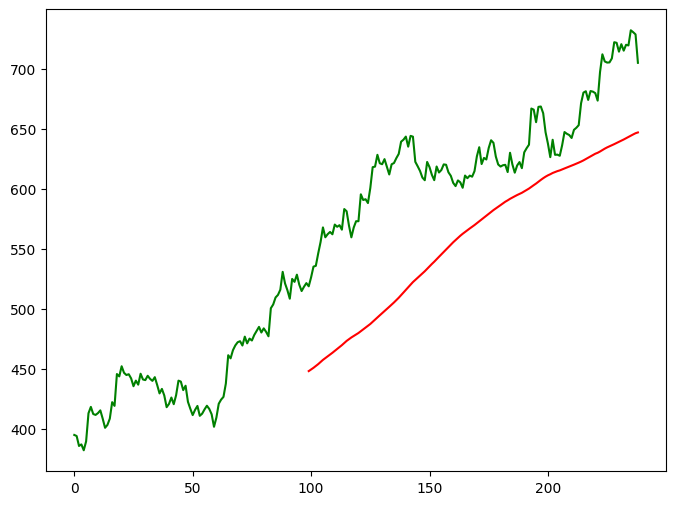

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

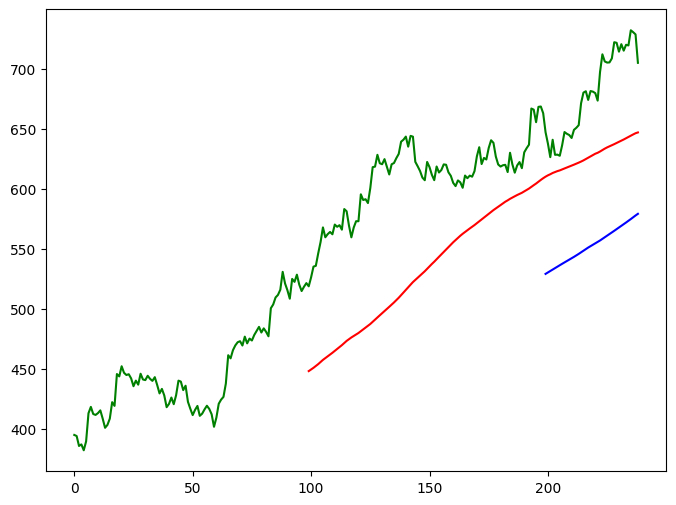

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

191

In [12]:
data_test.shape[0]

48

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [16]:
x, y = np.array(x), np.array(y)

In [ ]:
# Flatten the input data for Random Forest
x_flatten = x.reshape(x.shape[0], -1)

# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_flatten, y)

In [18]:
pas_100_days = data_train.tail(100)

In [19]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [20]:
data_test_scale  =  scaler.fit_transform(data_test)

In [23]:
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [24]:
# Flatten the test input data for Random Forest
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

# Make predictions using the Random Forest model
y_predict = rf_model.predict(x_test_flatten)

In [25]:
scale =1/scaler.scale_

In [26]:
y_predict = y_predict*scale

In [27]:
y = y*scale

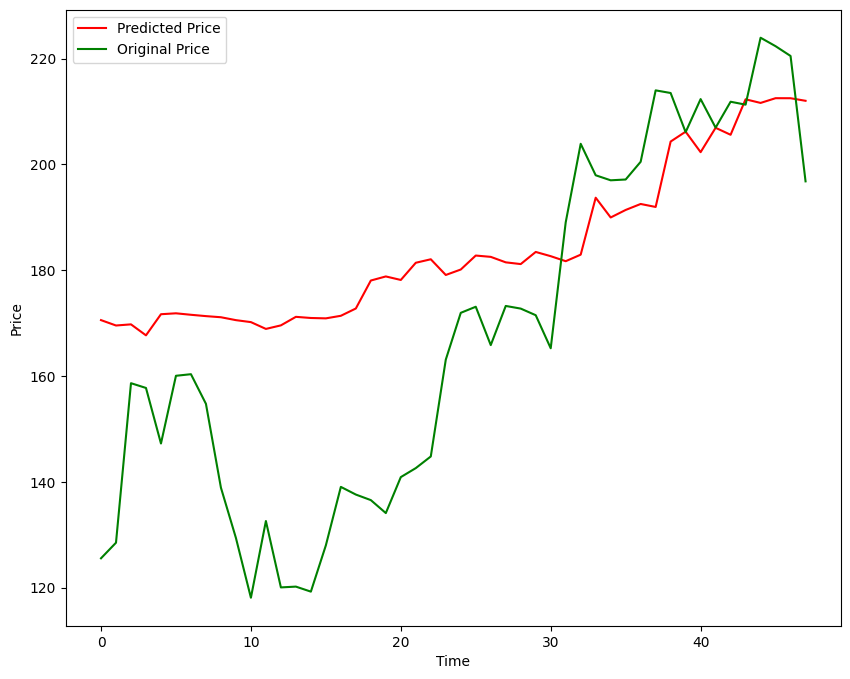

In [28]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')